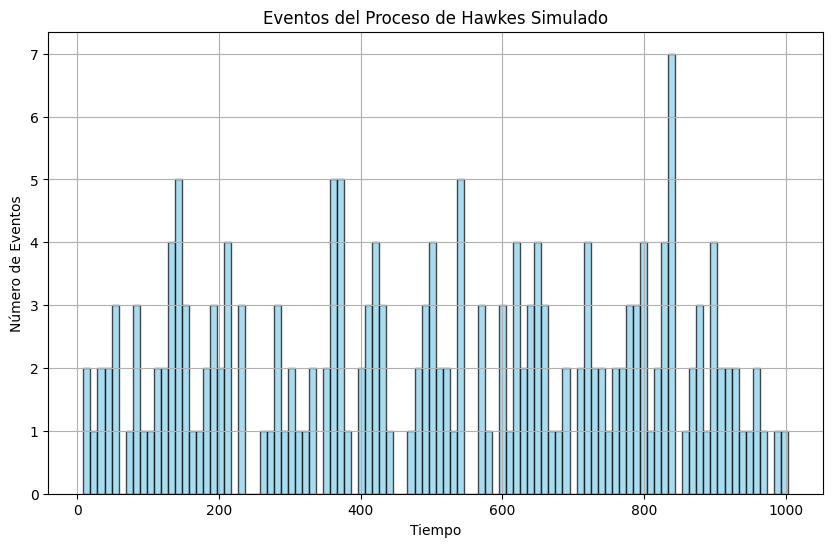

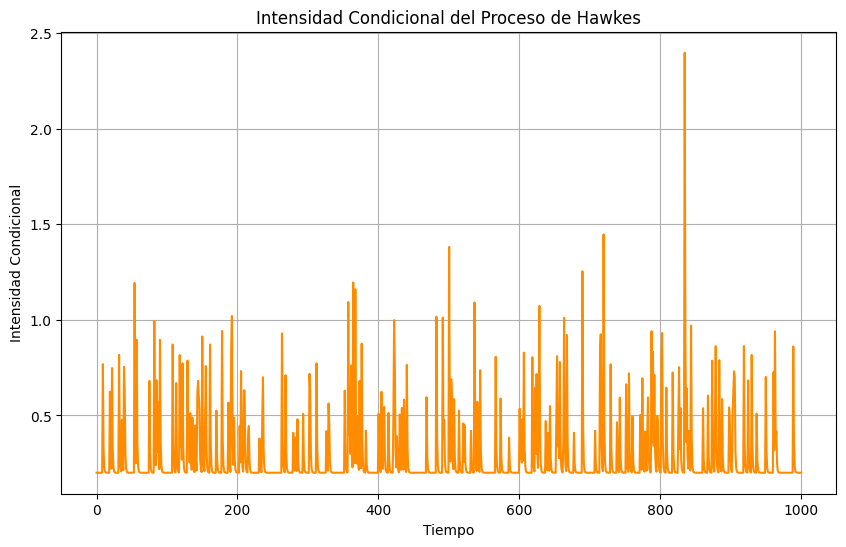

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes_process(mu, alpha, beta, T):
    """
    Simula un proceso de Hawkes con kernel exponencial.

    :param mu: Tasa base (intensidad de fondo)
    :param alpha: Parámetro de autoexcitación
    :param beta: Tasa de decaimiento exponencial del kernel
    :param T: Tiempo total de simulación
    :return: Lista de tiempos de eventos
    """
    # Lista de eventos inicial
    events = []
    t = 0  # Tiempo actual

    while t < T:
        # Calcular la intensidad actual
        if len(events) == 0:
            lambda_t = mu
        else:
            # Convertir eventos a numpy array para evitar problemas de tipo
            events_array = np.array(events)
            lambda_t = mu + alpha * np.sum(np.exp(-beta * (t - events_array)))

        # Tiempo hasta el siguiente evento (interarrival time)
        u = np.random.uniform(0, 1)
        tau = -np.log(u) / lambda_t

        # Actualizar el tiempo actual
        t += tau

        # Aceptar o rechazar el nuevo evento
        d = np.random.uniform(0, 1)
        if d <= mu / lambda_t:
            events.append(t)

    return events

def plot_hawkes_events(events, T):
    """
    Grafica los eventos de un proceso de Hawkes.

    :param events: Lista de tiempos de eventos
    :param T: Tiempo total de simulación
    """
    plt.figure(figsize=(10, 6))
    plt.hist(events, bins=int(T/10), color='skyblue', edgecolor='k', alpha=0.7)
    plt.title("Eventos del Proceso de Hawkes Simulado")
    plt.xlabel("Tiempo")
    plt.ylabel("Número de Eventos")
    plt.grid(True)
    plt.show()

def plot_conditional_intensity(events, mu, alpha, beta, T):
    """
    Grafica la intensidad condicional de un proceso de Hawkes.

    :param events: Lista de tiempos de eventos
    :param mu: Tasa base (intensidad de fondo)
    :param alpha: Parámetro de autoexcitación
    :param beta: Tasa de decaimiento exponencial del kernel
    :param T: Tiempo total de simulación
    """
    times = np.linspace(0, T, 1000)
    lambda_values = np.zeros_like(times)

    for i, t in enumerate(times):
        # Convertir eventos a numpy array para evitar problemas de tipo
        events_array = np.array(events)
        past_events = events_array[events_array < t]
        lambda_values[i] = mu + alpha * np.sum(np.exp(-beta * (t - past_events)))

    plt.figure(figsize=(10, 6))
    plt.plot(times, lambda_values, color='darkorange')
    plt.title("Intensidad Condicional del Proceso de Hawkes")
    plt.xlabel("Tiempo")
    plt.ylabel("Intensidad Condicional")
    plt.grid(True)
    plt.show()

# Parámetros del Proceso de Hawkes
mu = 0.2    # Tasa base (intensidad de fondo)
alpha = 0.8 # Parámetro de autoexcitación
beta = 1.5  # Tasa de decaimiento exponencial
T = 1000    # Tiempo total de simulación

# Simular el proceso
events = simulate_hawkes_process(mu, alpha, beta, T)

# Graficar los eventos
plot_hawkes_events(events, T)

# Graficar la intensidad condicional
plot_conditional_intensity(events, mu, alpha, beta, T)


In [10]:
significant_events_numeric

array([  2,   8,  10,  13,  15,  18,  19,  22,  26,  27,  28,  30,  32,
        35,  36,  43,  45,  47,  49,  50,  52,  56,  63,  64,  65,  68,
        70,  71,  73,  75,  76,  78,  80,  81,  84,  85,  87,  89,  91,
        93,  94,  98, 100, 101, 104, 105, 109, 110, 111, 113, 114, 116,
       119, 121, 127, 129, 135, 141, 146, 151, 159, 163, 170, 172, 174,
       186, 188, 189, 192, 196, 197, 198, 202, 204, 205, 207, 210, 215,
       216, 229, 233, 240, 245, 249, 254, 263, 264, 269, 271, 272, 275,
       284, 292, 299, 301, 330, 336, 350, 351, 387, 396, 412, 415, 455,
       467, 469, 505, 536, 576, 586, 608, 632, 636, 641])

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  399.049988  401.940002  396.880005  401.679993  394.854767   
2022-01-04  402.239990  402.279999  393.290009  396.470001  389.733307   
2022-01-05  394.739990  395.890015  384.029999  384.290009  377.760254   
2022-01-06  382.420013  387.350006  380.130005  384.019989  377.494904   
2022-01-07  384.029999  385.760010  378.040009  379.859985  373.405518   

              Volume  
Date                  
2022-01-03  40575900  
2022-01-04  58027200  
2022-01-05  75739800  
2022-01-06  70814300  
2022-01-07  72652300  
Fechas de eventos significativos: ['2022-01-05T00:00:00.000000000' '2022-01-13T00:00:00.000000000'
 '2022-01-18T00:00:00.000000000' '2022-01-21T00:00:00.000000000'
 '2022-01-25T00:00:00.000000000' '2022-01-28T00:00:00.000000000'
 '2022-01-31T00:00:00.000000000' '2022-02-03T00:00:00.000000000'
 '2022-02-09T00:00:00.0000

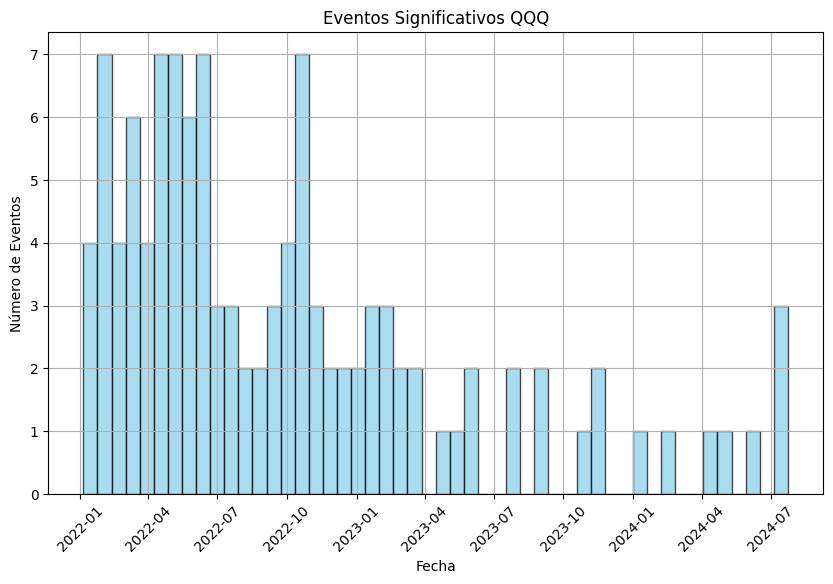

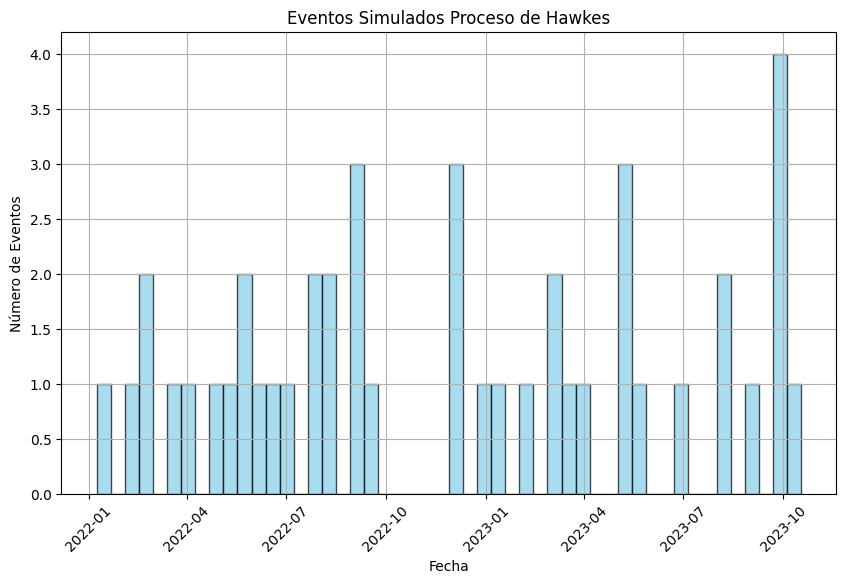

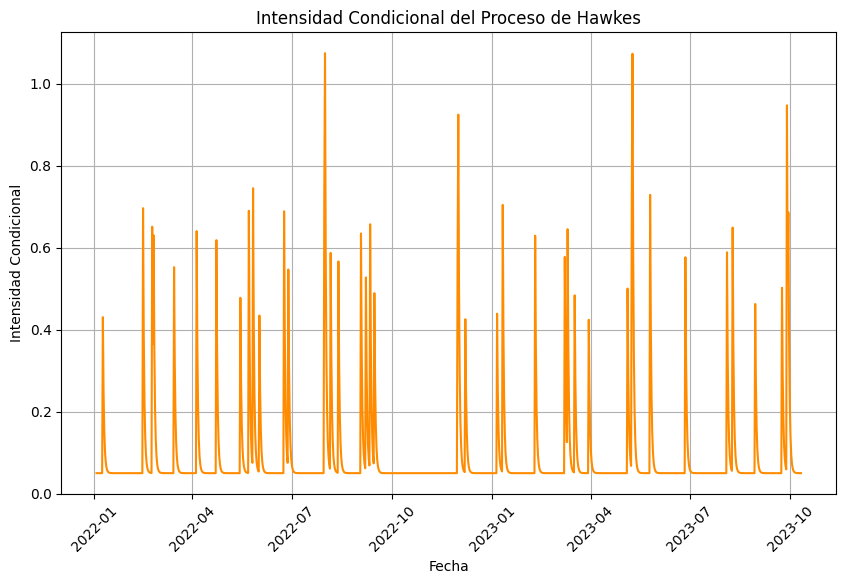

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos de QQQ
ticker = "QQQ"
data = yf.download(ticker, start="2022-01-01", end="2024-07-31", interval="1d")

# Mostrar los primeros registros
print(data.head())

# Calcular los cambios de precios diarios
data['Returns'] = data['Close'].pct_change()

# Definir umbral para eventos significativos (ejemplo: 2%)
threshold = 0.02

# Identificar eventos significativos
significant_events = data.index[data['Returns'].abs() > threshold].to_numpy()
significant_events_numeric = np.arange(len(data))[data['Returns'].abs() > threshold]

print("Fechas de eventos significativos:", significant_events)

def simulate_hawkes_process_from_events(events, mu, alpha, beta, T):
    """
    Simula un proceso de Hawkes usando eventos significativos.

    :param events: Lista de tiempos de eventos numéricos
    :param mu: Tasa base (intensidad de fondo)
    :param alpha: Parámetro de autoexcitación
    :param beta: Tasa de decaimiento exponencial del kernel
    :param T: Tiempo total de simulación
    :return: Lista de tiempos de eventos simulados
    """
    # Convertir eventos a numpy array
    events = np.sort(events)
    simulated_events = []
    t = 0  # Tiempo actual

    while t < T:
        # Calcular la intensidad actual
        past_events = events[events < t]
        lambda_t = mu + alpha * np.sum(np.exp(-beta * (t - past_events)))

        # Tiempo hasta el siguiente evento (interarrival time)
        u = np.random.uniform(0, 1)
        tau = -np.log(u) / lambda_t

        # Actualizar el tiempo actual
        t += tau

        # Aceptar o rechazar el nuevo evento
        d = np.random.uniform(0, 1)
        if d <= mu / lambda_t:
            simulated_events.append(t)

    return np.array(simulated_events)

# Parámetros del Proceso de Hawkes
mu = 0.05    # Tasa base
alpha = 0.7  # Parámetro de autoexcitación
beta = 1.0   # Tasa de decaimiento exponencial
T = len(data)  # Tiempo total basado en la longitud de la serie de datos

# Simular el proceso de Hawkes
simulated_events_numeric = simulate_hawkes_process_from_events(significant_events_numeric, mu, alpha, beta, T)

# Convertir tiempos simulados a fechas
simulated_event_dates = data.index[0] + pd.to_timedelta(simulated_events_numeric, unit='D')

# Graficar eventos simulados
def plot_hawkes_events(dates, title):
    """
    Grafica eventos de un proceso de Hawkes.

    :param dates: Fechas de eventos
    :param title: Título del gráfico
    """
    plt.figure(figsize=(10, 6))
    plt.hist(dates, bins=50, color='skyblue', edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Número de Eventos")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_hawkes_events(significant_events, "Eventos Significativos QQQ")
plot_hawkes_events(simulated_event_dates, "Eventos Simulados Proceso de Hawkes")

# Graficar la intensidad condicional
def plot_conditional_intensity(events, mu, alpha, beta, T):
    """
    Grafica la intensidad condicional de un proceso de Hawkes.

    :param events: Lista de tiempos de eventos
    :param mu: Tasa base (intensidad de fondo)
    :param alpha: Parámetro de autoexcitación
    :param beta: Tasa de decaimiento exponencial del kernel
    :param T: Tiempo total de simulación
    """
    times = np.linspace(0, T, 1000)
    lambda_values = np.zeros_like(times)

    for i, t in enumerate(times):
        past_events = events[events < t]
        lambda_values[i] = mu + alpha * np.sum(np.exp(-beta * (t - past_events)))

    plt.figure(figsize=(10, 6))
    plt.plot(data.index[0] + pd.to_timedelta(times, unit='D'), lambda_values, color='darkorange')
    plt.title("Intensidad Condicional del Proceso de Hawkes")
    plt.xlabel("Fecha")
    plt.ylabel("Intensidad Condicional")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_conditional_intensity(simulated_events_numeric, mu, alpha, beta, T)
